In [ ]:
Rita Kurban

Professor  Shekhar

CS156

# Code

In [73]:
# Install all the necessary packages
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from pylab import *
from PIL import Image
from skimage import io
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import sklearn.cross_validation
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [74]:
def img_processing(path, size):
    """Resize and crop an image. The input is the path to the image
    and a tuple of two sizes: width and height. The function first checks
    the ratio of the image and crops horizontally or vertically based on
    this ratio. After that, it transforms the image into a 1-D array.
    """
    img = Image.open(path)
    
    # Get current and desired ratio for the images
    current = img.size[0] / float(img.size[1])
    desired = size[0] / float(size[1])
    
    if current == desired:
        # There is no need to crop, so we simply resize the image
        img = img.resize((size[0], size[1]), Image.ANTIALIAS)
   
    elif desired > current:
        # Resize the image so that the ratio stays the same
        img = img.resize((int(size[0]), int(size[0]
                        * img.size[1] / img.size[0])),
                Image.ANTIALIAS)
        # As height is bigger that the width, crop the image vertically
        new_size = (0, (img.size[1] - size[1]) / 2,
            img.size[0], (img.size[1] + size[1]) / 2)
        img = img.crop(new_size)
    else:
        img = img.resize((int(size[1] * img.size[0] 
                        / img.size[1]), int(size[1])),
                Image.ANTIALIAS)
        # As width is bigger that the height, crop the image horizontally
        new_size = ((img.size[0] - size[0]) / 2,
        0, (img.size[0] + size[0]) / 2, img.size[1])
        img = img.crop(new_size)
        
    # Turn the image into 1-D Array
    img = np.array(list(img.getdata()))
    result = img.reshape(1, -1)
    return result[0]

In [75]:
# Load the data, 200 datapoints for men amd women
paths = ['/Users/ritakurban/Downloads/Woman/',
         '/Users/ritakurban/Downloads/Man/']
data = []
names = []
for path in paths:
    for img in listdir(path):
        img_path = path + img
        data.append(img_processing(img_path, (256, 256)))
        if img[:4] == "n045":
            names.append(1)
        else:
            names.append(0)
# Create a df with two columns: data and names (1 for women, 0 for men)
dataf = pd.DataFrame(data={'data' : data, 'names' : names})
dataf.head()


,data,names
0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",1
1,"[222, 217, 198, 223, 218, 199, 223, 218, 199, ...",1
2,"[229, 229, 231, 227, 227, 229, 228, 228, 230, ...",1
3,"[7, 7, 6, 7, 7, 6, 7, 7, 6, 7, 7, 6, 7, 7, 7, ...",1
4,"[147, 135, 126, 164, 169, 164, 126, 139, 122, ...",1


In [76]:
# Split the dataset into 80% training data and 20% testing data.
# After splitting the data set, I change the dimension of the
# output to a np.array of lists.
X, X_t, Y, Y_t = sklearn.cross_validation.train_test_split
(dataf.drop("names", axis = 1), dataf["names"], test_size = 0.2)
train_init = np.concatenate([list(i) for i in X.as_matrix()])
test_init = np.concatenate([list(i) for i in X_t.as_matrix()])
X_tr_init = np.array(train_init)
X_te_init = np.array(test_init)

In [77]:
def show1(array):
    """Transform the array so that io.imshow
    function can use it as an input. 
    """
    img = Image.new('RGB',(256,256))
    arr = np.empty((65536,), dtype=object)
    arr[:]=[tuple([int(pixels) for pixels in line])
            for line in array.reshape(65536, 3)]
    img.putdata(arr)
    return np.asarray(img)

Components:24


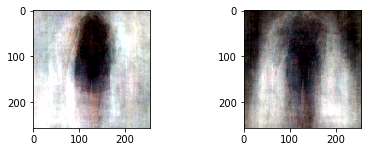

Components:32


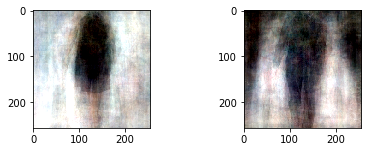

Components:40


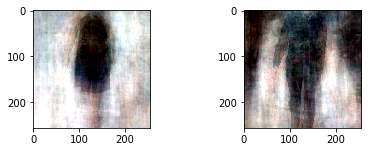

Components:48


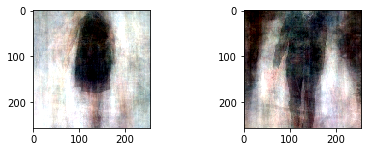

Components:56


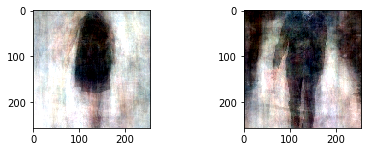

In [92]:
for i in range(3,8):
    # Plot images with different number of dimensions to
    # figure out which number is a good reduced representation
    n = i*8
    pca = decomposition.PCA(n_components = n)
    pca.fit(X_tr_init)
    
    print "Components:" + str(n)
    for j in range(1,3):
        # Transform and inverse transform two images, then show
        trans = pca.transform(X_tr_init[30:35])
        trans2 = pca.inverse_transform(trans)
        subplot(2,2,j)
        io.imshow(show1(trans2[j]))
    show()


From the images above, I can see that 40 components will be enough for the reduced representation as this number of dimensions captures the main features of the clothing (e.g., it's possible to see the arms) while reducing computational complexity.


In [44]:
# Perform PCA on the images 
pca = decomposition.PCA(n_components = 40)
pca.fit(np.array(X_tr_init))
reduced_pca = []
for j in range(len(dataf.data)):
    transformed = pca.transform(dataf.data[j])
    flattened_list = np.array([y for x in transformed for y in x])
    reduced_pca.append(flattened_list)
dataf = pd.DataFrame(data={'data' : data, 'names' : names,
                           'PCA' : reduced_pca})
dataf.head()

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lo

,PCA,data,names
0,"[5822.511608082183, 12858.940142288548, 544.38...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",1
1,"[33194.359839581324, -9548.982044259017, 2047....","[222, 217, 198, 223, 218, 199, 223, 218, 199, ...",1
2,"[29180.111002319238, -11743.330634011554, 2154...","[229, 229, 231, 227, 227, 229, 228, 228, 230, ...",1
3,"[-2495.4933235586195, -19516.845588667213, 242...","[7, 7, 6, 7, 7, 6, 7, 7, 6, 7, 7, 6, 7, 7, 7, ...",1
4,"[-8597.777677884207, 4344.234651114658, -869.1...","[147, 135, 126, 164, 169, 164, 126, 139, 122, ...",1


In [78]:
# Perform LDA and add a column of reduced values to the df
lda = LinearDiscriminantAnalysis()
lda.fit(X_tr_init, Y)

reduced = []
for j in range(len(dataf.data)):
    transformed = lda.transform(dataf.data[j])
    # Flatten the list to make it possible to add it to the df
    flattened_list = np.array([y for x in transformed for y in x])
    reduced.append(flattened_list)
dataf = pd.DataFrame(data={'data' : data, 'names' : names, 
                        'PCA' : reduced_pca, 'LDA' : reduced})
dataf.head()

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lo

,LDA,PCA,data,names
0,[1.0269799150188628],"[5822.511608082183, 12858.940142288548, 544.38...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",1
1,[-0.3974449093226913],"[33194.359839581324, -9548.982044259017, 2047....","[222, 217, 198, 223, 218, 199, 223, 218, 199, ...",1
2,[0.8975122688756724],"[29180.111002319238, -11743.330634011554, 2154...","[229, 229, 231, 227, 227, 229, 228, 228, 230, ...",1
3,[-0.1762929888966981],"[-2495.4933235586195, -19516.845588667213, 242...","[7, 7, 6, 7, 7, 6, 7, 7, 6, 7, 7, 6, 7, 7, 7, ...",1
4,[0.809935674511802],"[-8597.777677884207, 4344.234651114658, -869.1...","[147, 135, 126, 164, 169, 164, 126, 139, 122, ...",1


In [80]:
# Performing a similar procedure as in the code above
# The purpose is to change the dimension of data to make it possible
# to use it as an input to the SVC classifier to measure its accuracy.
dataf["names"].value_counts()

# Drop some irrelevant columns
X_tr, X_te, Y_train, Y_test = sklearn.cross_validation.train_test_split
(dataf.drop(["names","PCA","LDA"], axis = 1), dataf["names"], test_size = 0.2)
X_trpca, X_tepca, Y_trainpca, Y_testpca = sklearn.cross_validation.train_test_split
(dataf.drop(["names","PCA","LDA"], axis = 1), dataf["PCA"], test_size = 0.2)
X_trlda, X_telda, Y_trainlda, Y_testlda = sklearn.cross_validation.train_test_split
(dataf.drop(["names","PCA","LDA"], axis = 1), dataf["LDA"], test_size = 0.2)

# Change the format of the input
train = np.concatenate([list(i) for i in X_tr.as_matrix() ])
test = np.concatenate([list(i) for i in X_te.as_matrix() ])
trainpca = np.concatenate([list(i) for i in X_trpca.as_matrix() ])
testpca = np.concatenate([list(i) for i in X_tepca.as_matrix() ])
trainlda = np.concatenate([list(i) for i in X_trlda.as_matrix() ])
testlda = np.concatenate([list(i) for i in X_telda.as_matrix() ])
X_train = np.array(train)
X_test = np.array(test)
X_train_PCA = np.array(trainpca)
X_test_PCA = np.array(testpca)
X_train_LDA = np.array(trainlda)
X_test_LDA = np.array(testlda)

In [93]:
# Building a linear SVC 
clf = LinearSVC(random_state=0)
clf.fit(X_train, Y_train)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
# Predict on the original images
pred = clf.predict(X_test)
pred_known = clf.predict(X_train)

# Print performance metrics
print "Train Data"
print("Accuracy: %f" % metrics.accuracy_score(Y_train, pred_known))
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(Y_train, pred_known)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Y_train, pred_known))

print "Unknown Data"
print("Accuracy: %f" % metrics.accuracy_score(Y_test, pred))
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(Y_test, pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Y_test, pred))

Train Data
Accuracy: 1.000000
Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       157
          1       1.00      1.00      1.00       159

avg / total       1.00      1.00      1.00       316


Confusion matrix:
[[157   0]
 [  0 159]]
Unknown Data
Accuracy: 0.675000
Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       0.70      0.63      0.67        41
          1       0.65      0.72      0.68        39

avg / total       0.

In [94]:
# Fitting the classifier on PCA-reduced images
clf.fit(X_train_PCA, Y_train)
pred1 = clf.predict(X_test_PCA)
pred1_known = clf.predict(X_train_PCA)

# Print performance metrics
print "Train Data"
print("Accuracy: %f" % metrics.accuracy_score(Y_train, pred1_known))
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(Y_train, pred1_known)))

print "Unknown Data"
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Y_train, pred_known))
print("Accuracy: %f" % metrics.accuracy_score(Y_test, pred1))
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(Y_test, pred1)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Y_test, pred1))

Train Data
Accuracy: 1.000000
Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       157
          1       1.00      1.00      1.00       159

avg / total       1.00      1.00      1.00       316


Unknown Data
Confusion matrix:
[[157   0]
 [  0 159]]
Accuracy: 0.412500
Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       0.44      0.59      0.51        41
          1       0.35      0.23      0.28        39

avg / total       0.

In [95]:
# Fitting the classifier on LDA-reduced images
clf.fit(X_train_LDA, Y_train)
pred2 = clf.predict(X_test_LDA)
pred2_known = clf.predict(X_train_LDA)

# Print performance metrics
print "Train Data"
print("Accuracy: %f" % metrics.accuracy_score(Y_train, pred2_known))
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(Y_train, pred2_known)))

print "Unknown Data"
print("Accuracy: %f" % metrics.accuracy_score(Y_test, pred2))
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(Y_test, pred2)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Y_test, pred2))

Train Data
Accuracy: 1.000000
Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       157
          1       1.00      1.00      1.00       159

avg / total       1.00      1.00      1.00       316


Unknown Data
Accuracy: 0.437500
Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       0.44      0.39      0.42        41
          1       0.43      0.49      0.46        39

avg / total       0.44      0.44      0.44        80


Confus

# Discussion

I built a linear support vector classification model to compare its performance on regular images and their reduced representation which I did with the help of principal component analysis and linear discriminant analysis. 

First of all, I have to acknowledge some of the limitations of the original data. As you can see from the pictures below, the datasets require some cleaning because the images are often ambiguous (sometimes there are women in men's clothing data and vice versa). Moreover, the images are not centered (some of them contain multiple items of clothing or just people/fabric) and so it's difficult for the classifier to extract all the necessary features. 


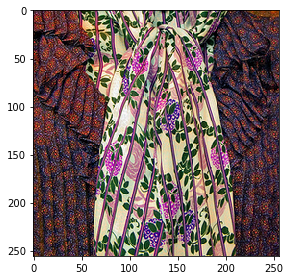

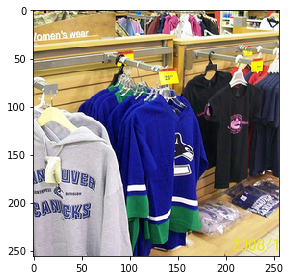

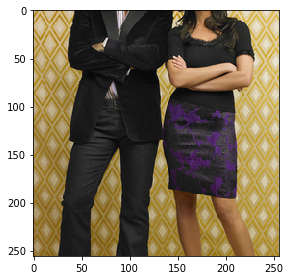

In [67]:
# Examples of images that are difficult to classify because of their ambiguity
for i in [8,18,107]:
    io.imshow(show1(data[i]))
    plt.show()

As expected, the accuracy of the classifier on the training sets is 1.

However, both LDA and PCA reduced representations performed slightly worse than original images on the test data. The accuracy of the classifier on the original dataset is 67% which is slightly higher than random. In contrast, reduced representations performed slightly worse than the random baseline. The PCA got an accuracy of 41% while the LDA performed somewhat better with the score of 44%. 

 The focus of the PCA is to use an orthogonal transformation to identify principal components in such a way that the first PC has the largest possible variance (accounts for as much of the variability in the data as possible). Each succeeding component has the next highest variance possible given that it's orthogonal to the preceding components. By doing so, the PCA tries to preserve as much information as possible, while reducing the computational complexity. It performed worse than original images since some important information probably got lost in the process of dimensionality reduction. It is easy to explain why the accuracy of the LDA is higher. The LDA's major purpose is to maximize the separability among known categories. This technique is often used before classification, and it focuses on the distinctions between two classes (maximizes the distance between the means and minimizes the scatter). Originally, I thought it would be the best choice for this classification problem.

The reason why the LDA performed worse than the original dataset might be hidden in the dataset itself. As I've explained earlier, the data is not appropriately cleaned. Another problem might be a small sample size. Being constrained by the computational power of my computer, I couldn't load more than 200 images for each category. 

